# Data Science Project: Planning Stage

**Name**: JunHyun Kim  
**Student Number**: 25323270  
**Group**: 10  

In [1]:
import pandas as pd
import altair as alt

# Title: Predicting and Optimizing Server Resource Allocation Based on Player Activity

## **Introduction**

### **Dataset Description**

In this project, we used two primary datasets to analyze player activity and optimize server resource allocation. These datasets are:

1. **`players.csv`** – Contains information about the players, including their experience level, subscription status, and hours played.
2. **`sessions.csv`** – Contains session details, such as the start and end times of each player's session.

These datasets were used to answer the question: **"How can we predict and optimize server resource allocation based on the number of concurrent players in each session?"**

### **1. `players.csv` Dataset**

The `players.csv` dataset provides detailed information about the players, which includes their **experience level**, **subscription status**, **gameplay hours**, and basic demographic information.

#### Main columns in `players.csv`:
- **`experience`**: The experience level of the player (e.g., "Pro", "Veteran", "Regular", "Amateur").
- **`subscribe`**: A boolean value indicating whether the player has a subscription (`True` or `False`).
- **`hashedEmail`**: A unique identifier for the player, stored as a hashed email address.
- **`played_hours`**: The total number of hours the player has spent playing the game.
- **`name`**: The player's name.
- **`gender`**: The player's gender.
- **`age`**: The player's age.
- **`individualId`**: An identifier for the player, possibly an internal ID for tracking purposes.
- **`organizationName`**: The name of the player's organization (if applicable).

#### Key Information from `players.csv`:
- **Number of Rows**: 196 players.
- **Number of Columns**: 9 attributes per player.
- **Data Types**: The dataset contains both categorical (e.g., `experience`, `gender`) and numerical (e.g., `played_hours`, `age`) data.

This dataset is important for understanding **player behavior** and how factors like **experience** and **age** might influence the number of connections (active players) at different times of the day.

### **2. `sessions.csv` Dataset**

The `sessions.csv` dataset contains information about the sessions in which players were actively playing the game. It records **session start and end times**, and is crucial for determining how long players are active and when their sessions occur.

#### Main columns in `sessions.csv`:
- **`hashedEmail`**: The player's unique identifier (same as in `players.csv`).
- **`start_time`**: The start time of the player's session, recorded as a string in the format `DD/MM/YYYY HH:MM`.
- **`end_time`**: The end time of the player's session, also recorded as a string in the same format as `start_time`.
- **`original_start_time`**: A timestamp in Unix format, representing the session's start time.
- **`original_end_time`**: A timestamp in Unix format, representing the session's end time.

#### Key Information from `sessions.csv`:
- **Number of Rows**: 1535 session entries.
- **Number of Columns**: 5 attributes per session.
- **Data Types**: The dataset includes both categorical data (e.g., `hashedEmail`) and datetime data (e.g., `start_time`, `end_time`).

This dataset is critical for determining **when players are active**, and analyzing **peak hours** or **days of the week** for player activity. The session duration (calculated from `start_time` and `end_time`) will also be important for identifying **intense activity periods** and **server load**.

### **Data Cleaning and Wrangling**

The datasets were cleaned and preprocessed as follows:

- **Datetime Conversion**: The `start_time` and `end_time` columns in the `sessions.csv` dataset were converted to proper `datetime` format to allow time-based analysis.
- **Session Duration**: We calculated the **session duration** by subtracting the `start_time` from the `end_time` to get the total duration of each session in minutes.
- **Handling Missing Data**: Rows with missing `end_time` values were dropped, as the session duration could not be calculated without this information.
- **Feature Extraction**: We extracted the **hour** and **day of the week** from the `start_time` column to enable analysis of player activity patterns by time.

We then aggregated the data by **hour**, **day of the week**, and both **hour and day of the week** to identify trends in player activity, which is essential for understanding when to allocate server resources more efficiently.

---

In [2]:
# Load the datasets
players_df = pd.read_csv("players.csv")
sessions_df = pd.read_csv("sessions.csv")

# Display the first few rows of each dataset
print("First few rows of players.csv:")
display(players_df.head())

print("\nFirst few rows of sessions.csv:")
display(sessions_df.head())

First few rows of players.csv:


,experience,subscribe,hashedEmail,played_hours,name,gender,age,individualId,organizationName
0,Pro,True,f6daba428a5e19a3d47574858c13550499be23603422e6...,30.3,Morgan,Male,9,NaN,NaN
1,Veteran,True,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa9397...,3.8,Christian,Male,17,NaN,NaN
2,Veteran,False,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3...,0.0,Blake,Male,17,NaN,NaN
3,Amateur,True,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4f...,0.7,Flora,Female,21,NaN,NaN
4,Regular,True,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb...,0.1,Kylie,Male,21,NaN,NaN



First few rows of sessions.csv:


,hashedEmail,start_time,end_time,original_start_time,original_end_time
0,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431...,30/06/2024 18:12,30/06/2024 18:24,1.719770e+12,1.719770e+12
1,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f5...,17/06/2024 23:33,17/06/2024 23:46,1.718670e+12,1.718670e+12
2,f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3...,25/07/2024 17:34,25/07/2024 17:57,1.721930e+12,1.721930e+12
3,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431...,25/07/2024 03:22,25/07/2024 03:58,1.721880e+12,1.721880e+12
4,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f5...,25/05/2024 16:01,25/05/2024 16:12,1.716650e+12,1.716650e+12


In [3]:
# Get the shape of the DataFrame
num_players = players_df.shape[0]
num_player_vars = players_df.shape[1]
print(f"Number of players: {num_players}")
print(f"Number of variables in players.csv: {num_player_vars}")

# Get the shape of the DataFrame
num_sessions = sessions_df.shape[0]
num_session_vars = sessions_df.shape[1]
print(f"Number of sessions: {num_sessions}")
print(f"Number of variables in sessions.csv: {num_session_vars}")

Number of players: 196
Number of variables in players.csv: 9
Number of sessions: 1535
Number of variables in sessions.csv: 5


In [4]:
# Display data types
print("Data types in players.csv:")
print(players_df.dtypes)

print("\nData types in sessions.csv:")
print(sessions_df.dtypes)

# Display missing values
print("\nMissing values in players.csv:")
print(players_df.isnull().sum())

print("\nMissing values in sessions.csv:")
print(sessions_df.isnull().sum())

Data types in players.csv:
experience           object
subscribe              bool
hashedEmail          object
played_hours        float64
name                 object
gender               object
age                   int64
individualId        float64
organizationName    float64
dtype: object

Data types in sessions.csv:
hashedEmail             object
start_time              object
end_time                object
original_start_time    float64
original_end_time      float64
dtype: object

Missing values in players.csv:
experience            0
subscribe             0
hashedEmail           0
played_hours          0
name                  0
gender                0
age                   0
individualId        196
organizationName    196
dtype: int64

Missing values in sessions.csv:
hashedEmail            0
start_time             0
end_time               2
original_start_time    0
original_end_time      2
dtype: int64


In [5]:
# Convert "start_time" and "end_time" to datetime format
sessions_df["start_time"] = pd.to_datetime(sessions_df["start_time"], format="%d/%m/%Y %H:%M")
sessions_df["end_time"] = pd.to_datetime(sessions_df["end_time"], format="%d/%m/%Y %H:%M")

# Drop rows with missing end times
sessions_df = sessions_df.dropna(subset=["end_time"])
# Calculate session duration in minutes
sessions_df["session_duration"] = (sessions_df["end_time"] - sessions_df["start_time"]).dt.total_seconds() / 60

# Filter out sessions with zero duration
sessions_df = sessions_df[sessions_df["session_duration"] > 0]

# Extract day of the week and hour from start time
sessions_df["day_of_week"] = sessions_df["start_time"].dt.day_name()
sessions_df["hour"] = sessions_df["start_time"].dt.hour

# Reorder columns for consistency
sessions_df = sessions_df[["hashedEmail", "start_time", "end_time", "day_of_week", "hour", "session_duration"]]

# Mapping Day to numeric vaule, Start as Monday: 0
sessions_df["day_of_week_numeric"] = sessions_df["day_of_week"].replace({
    "Monday": 0,
    "Tuesday": 1,
    "Wednesday": 2,
    "Thursday": 3,
    "Friday": 4,
    "Saturday": 5,
    "Sunday": 6
})

# Preview the cleaned and tidied data
sessions_df.head()

,hashedEmail,start_time,end_time,day_of_week,hour,session_duration,day_of_week_numeric
0,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431...,2024-06-30 18:12:00,2024-06-30 18:24:00,Sunday,18,12.0,6
1,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f5...,2024-06-17 23:33:00,2024-06-17 23:46:00,Monday,23,13.0,0
2,f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3...,2024-07-25 17:34:00,2024-07-25 17:57:00,Thursday,17,23.0,3
3,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431...,2024-07-25 03:22:00,2024-07-25 03:58:00,Thursday,3,36.0,3
4,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f5...,2024-05-25 16:01:00,2024-05-25 16:12:00,Saturday,16,11.0,5


In [6]:
# Create a list to store the expanded data
expanded_data = []

# Iterate through each session row
for index, row in sessions_df.iterrows():
    start_hour = row["start_time"].hour
    end_hour = row["end_time"].hour
    day_of_week = row["start_time"].day_name()
    
    # Add an entry for each hour within the session duration
    for hour in range(start_hour, end_hour + 1):
        expanded_data.append({"day_of_week": day_of_week, "hour": hour})

# Convert the expanded data into a DataFrame
expanded_sessions_df = pd.DataFrame(expanded_data)

# Group by day_of_week and hour to count the number of connections
hourly_connections = expanded_sessions_df.groupby(["day_of_week", "hour"]).size().reset_index(name="connections")

# Mapping Day to numeric vaule, Start as Monday: 0
hourly_connections["day_of_week_numeric"] = hourly_connections["day_of_week"].replace({
    "Monday": 0,
    "Tuesday": 1,
    "Wednesday": 2,
    "Thursday": 3,
    "Friday": 4,
    "Saturday": 5,
    "Sunday": 6
})

# Display the results
hourly_connections.head()

,day_of_week,hour,connections,day_of_week_numeric
0,Friday,0,16,4
1,Friday,1,21,4
2,Friday,2,27,4
3,Friday,3,41,4
4,Friday,4,32,4


In [7]:
# Check for missing values in the dataset
print("Missing values in sessions_df:")
print(hourly_connections.isnull().sum())

# Display basic statistical summary
print("\nStatistical summary of sessions_df:")
print(hourly_connections.describe())

# Check data types of each column
print("\nData types of sessions_df:")
print(hourly_connections.dtypes)


Missing values in sessions_df:
day_of_week            0
hour                   0
connections            0
day_of_week_numeric    0
dtype: int64

Statistical summary of sessions_df:
             hour  connections  day_of_week_numeric
count  153.000000   153.000000           153.000000
mean    11.405229    16.424837             2.993464
std      7.254253    12.146958             2.008196
min      0.000000     1.000000             0.000000
25%      5.000000     6.000000             1.000000
50%     11.000000    14.000000             3.000000
75%     18.000000    24.000000             5.000000
max     23.000000    50.000000             6.000000

Data types of sessions_df:
day_of_week            object
hour                    int64
connections             int64
day_of_week_numeric     int64
dtype: object


In [8]:
# Aggregate connections by hour
hourly_connections = sessions_df.groupby("hour").size().reset_index(name="connections")

# Aggregate connections by day of the week
daily_connections = sessions_df.groupby("day_of_week_numeric").size().reset_index(name="connections")

# Aggregate connections by both day of the week and hour
day_hour_connections = sessions_df.groupby(["day_of_week_numeric", "hour"]).size().reset_index(name="connections")

# Display aggregated data
print("Hourly Connections:")
print(hourly_connections.head())

print("\nDaily Connections:")
print(daily_connections.head())

print("\nDay-Hour Connections:")
print(day_hour_connections.head())


Hourly Connections:
   hour  connections
0     0          128
1     1           79
2     2          152
3     3          131
4     4          150

Daily Connections:
   day_of_week_numeric  connections
0                    0          207
1                    1          203
2                    2          210
3                    3          223
4                    4          181

Day-Hour Connections:
   day_of_week_numeric  hour  connections
0                    0     0           22
1                    0     1           11
2                    0     2           14
3                    0     3           19
4                    0     4           26


In [9]:
hour_chart = alt.Chart(hourly_connections).mark_line().encode(
    x=alt.X("hour:O", title="Hour of the Day", axis=alt.Axis(labelAngle=0)),
    y=alt.Y("connections:Q", title="Number of Connections"),
    color=alt.value("steelblue")
).properties(
    title="Number of Connections by Hour of the Day"
)

hour_chart

alt.Chart(...)

In [10]:
# Replace day_of_week_numeric with day names
daily_connections["day_of_week"] = daily_connections["day_of_week_numeric"].replace({
    0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 
    4: "Friday", 5: "Saturday", 6: "Sunday"
})

day_chart = alt.Chart(daily_connections).mark_bar().encode(
    x=alt.X("day_of_week:O", title="Day of the Week", sort=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]),
    y=alt.Y("connections:Q", title="Number of Connections"),
    color=alt.Color("connections:Q", scale=alt.Scale(scheme="viridis"))
).properties(
    title="Number of Connections by Day of the Week"
)

day_chart


alt.Chart(...)

In [11]:
day_hour_chart = alt.Chart(day_hour_connections).mark_circle(size=100).encode(
    x=alt.X("hour:O", title="Hour of the Day", axis=alt.Axis(labelAngle=0)),
    y=alt.Y("day_of_week_numeric:O", 
            title="Day of the Week", 
            sort=[0, 1, 2, 3, 4, 5, 6],
            axis=alt.Axis(
                labelExpr="datum.value == 0 ? 'Monday' : "
                          "datum.value == 1 ? 'Tuesday' : "
                          "datum.value == 2 ? 'Wednesday' : "
                          "datum.value == 3 ? 'Thursday' : "
                          "datum.value == 4 ? 'Friday' : "
                          "datum.value == 5 ? 'Saturday' : 'Sunday'"
            )),
    size=alt.Size("connections:Q", title="Connections"),
    color=alt.Color("connections:Q", scale=alt.Scale(scheme="blues")),
).properties(
    title="Number of Connections by Day and Hour",
    width=800,
    height=400
)

day_hour_chart


alt.Chart(...)

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
import pandas as pd

# Define the preprocessor
preprocessor = make_column_transformer(
    (StandardScaler(), ["connections"]),
    verbose_feature_names_out=False,
)

# Set the range for possible cluster numbers
ks = range(1, 10)

# Compute WSSD for each value of K using list comprehension
wssds = [
    make_pipeline(
        preprocessor,
        KMeans(n_clusters=k, random_state=42)
    ).fit(day_hour_connections)[1].inertia_
    for k in ks
]

# Create a dataframe to store K and WSSD values
elbow_df = pd.DataFrame({
    "k": ks,
    "wssd": wssds,
})

# Plot the Elbow Curve
elbow_plot = alt.Chart(elbow_df).mark_line(point=True).encode(
    x=alt.X("k:N", title="Number of Clusters"),
    y=alt.Y("wssd:Q", title="Total Within-Cluster Sum of Squares (WSSD)"),
    tooltip=["k", "wssd"]
).properties(
    title="Elbow Method for Optimal K"
)
elbow_plot


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

alt.Chart(...)

In [13]:
# Set optimal number of clusters
optimal_k = 3

# Create and fit the pipeline
clustering_pipeline = make_pipeline(
    preprocessor,
    KMeans(n_clusters=optimal_k, random_state=42)
)
clustering_pipeline.fit(day_hour_connections)

# Add cluster labels to the original dataframe
day_hour_connections["cluster"] = clustering_pipeline[1].labels_

# Define a mapping for descriptive cluster labels
cluster_mapping = {0: "Low", 2: "Medium", 1: "High"}
day_hour_connections["density_label"] = day_hour_connections["cluster"].map(cluster_mapping)

# Display sample of labeled data
day_hour_connections[["hour", "day_of_week_numeric", "connections", "density_label"]].head()

day_hour_connections

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,day_of_week_numeric,hour,connections,cluster,density_label
0,0,0,22,1,High
1,0,1,11,2,Medium
2,0,2,14,2,Medium
3,0,3,19,1,High
4,0,4,26,1,High
...,...,...,...,...,...
133,6,19,18,1,High
134,6,20,19,1,High
135,6,21,20,1,High
136,6,22,20,1,High


In [14]:
# Updated visualization with descriptive labels
cluster_plot = alt.Chart(day_hour_connections).mark_circle(size=60).encode(
    x=alt.X("hour:O", title="Hour of the Day"),
    y=alt.Y("connections:Q", title="Number of Connections"),
    color=alt.Color("density_label:N", title="Session Density"),
    tooltip=["hour", "day_of_week_numeric", "connections", "density_label"]
).properties(
    title="K-Means Clustering of Connection Density (Descriptive Labels)",
    width=800,
    height=400
)

cluster_plot


alt.Chart(...)

In [15]:
# Map point sizes to the density labels for visualization
point_size_mapping = {"Low": 40, "Medium": 80, "High": 120}
day_hour_connections["size"] = day_hour_connections["density_label"].map(point_size_mapping)

# Updated visualization
day_hour_cluster_chart = alt.Chart(day_hour_connections).mark_circle().encode(
    x=alt.X("hour:O", title="Hour of the Day", axis=alt.Axis(labelAngle=0)),
    y=alt.Y("day_of_week_numeric:O", 
            title="Day of the Week", 
            sort=[0, 1, 2, 3, 4, 5, 6],
            axis=alt.Axis(labelExpr="datum.value == 0 ? 'Monday' : datum.value == 1 ? 'Tuesday' : datum.value == 2 ? 'Wednesday' : datum.value == 3 ? 'Thursday' : datum.value == 4 ? 'Friday' : datum.value == 5 ? 'Saturday' : 'Sunday'")
           ),
    color=alt.Color("density_label:N", title="Cluster"),
    size=alt.Size("size:Q", title="Point Size", legend=None),
    tooltip=["day_of_week_numeric", "hour", "density_label", "connections"]
).properties(
    title="Clustering Results: Day and Hour",
    width=800,
    height=400
)

day_hour_cluster_chart

alt.Chart(...)

In [16]:
# Cluster distribution summary
cluster_distribution = day_hour_connections["density_label"].value_counts().reset_index()
cluster_distribution.columns = ["Cluster", "Count"]

print("\nCluster Distribution:")
print(cluster_distribution)


Cluster Distribution:
  Cluster  Count
0  Medium     58
1     Low     48
2    High     32


In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

# Function to train and evaluate KNN with a single iteration
def evaluate_knn_once(features, target, train_size=0.75, k_range=range(1, 19), cv_folds=5):
    """
    Trains and evaluates a single KNN regression model.

    Args:
        features (DataFrame): Input features (X).
        target (Series): Target variable (y).
        train_size (float): Training set size proportion.
        k_range (range): Range of K values for GridSearchCV.
        cv_folds (int): Number of cross-validation folds.

    Returns:
        float: RMSPE for the tuned model.
    """
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=train_size)

    # Define the KNN pipeline
    knn_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor())

    # Perform GridSearchCV to find optimal K
    param_grid = {"kneighborsregressor__n_neighbors": k_range}
    grid_search = GridSearchCV(
        estimator=knn_pipeline,
        param_grid=param_grid,
        cv=cv_folds,
        scoring="neg_root_mean_squared_error"
    )
    grid_search.fit(X_train, y_train)

    # Evaluate tuned model
    best_knn_model = grid_search.best_estimator_
    y_pred = best_knn_model.predict(X_test)
    rmspe = np.sqrt(np.mean((y_test - y_pred) ** 2) / np.mean(y_test ** 2))
    return rmspe

# Function to train and evaluate KNN with a single iteration (modified to return optimal k)
def evaluate_knn_once_with_k(features, target, train_size=0.75, k_range=range(1, 19), cv_folds=5):
    """
    Trains and evaluates a single KNN regression model and returns RMSPE and optimal K.

    Args:
        features (DataFrame): Input features (X).
        target (Series): Target variable (y).
        train_size (float): Training set size proportion.
        k_range (range): Range of K values for GridSearchCV.
        cv_folds (int): Number of cross-validation folds.

    Returns:
        tuple: RMSPE for the tuned model, optimal K.
    """
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=train_size)

    # Define the KNN pipeline
    knn_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor())

    # Perform GridSearchCV to find optimal K
    param_grid = {"kneighborsregressor__n_neighbors": k_range}
    grid_search = GridSearchCV(
        estimator=knn_pipeline,
        param_grid=param_grid,
        cv=cv_folds,
        scoring="neg_root_mean_squared_error"
    )
    grid_search.fit(X_train, y_train)

    # Evaluate tuned model
    best_knn_model = grid_search.best_estimator_
    y_pred = best_knn_model.predict(X_test)
    rmspe = np.sqrt(np.mean((y_test - y_pred) ** 2) / np.mean(y_test ** 2))
    
    # Retrieve the optimal K value
    optimal_k = grid_search.best_params_["kneighborsregressor__n_neighbors"]

    return rmspe, optimal_k

# Function to run multiple iterations and calculate average RMSPE
def evaluate_knn_multiple(features, target, iterations=50, train_size=0.75, k_range=range(1, 19), cv_folds=5):
    """
    Runs multiple iterations of KNN evaluation and calculates average RMSPE.

    Args:
        features (DataFrame): Input features (X).
        target (Series): Target variable (y).
        iterations (int): Number of iterations.
        train_size (float): Training set size proportion.
        k_range (range): Range of K values for GridSearchCV.
        cv_folds (int): Number of cross-validation folds.

    Returns:
        tuple: (list of RMSPEs, average RMSPE, std RMSPE)
    """
    rmspe_list = []
    for _ in range(iterations):
        rmspe = evaluate_knn_once(features, target, train_size, k_range, cv_folds)
        rmspe_list.append(rmspe)
    avg_rmspe = np.mean(rmspe_list)
    std_rmspe = np.std(rmspe_list)
    return rmspe_list, avg_rmspe, std_rmspe

# Convert 'density_label' to numeric values
day_hour_connections["density_label_numeric"] = day_hour_connections["density_label"].replace({
    "Low": 0,
    "Medium": 1,
    "High": 2
})

# Evaluate Full Dataset
print("============= Full Dataset =============")
features_full = day_hour_connections[["hour", "day_of_week_numeric"]]
target_full = day_hour_connections["connections"]
rmspe_list_full, avg_rmspe_full, std_rmspe_full = evaluate_knn_multiple(features_full, target_full)
print(f"Average RMSPE (Full Dataset): {avg_rmspe_full:.4f}")
print(f"Std RMSPE (Full Dataset): {std_rmspe_full:.4f}")


# Evaluate Full Dataset with Density Labels and track optimal K
print("\n=== Full Dataset with Density Labels ===")
features_with_density = day_hour_connections[["hour", "day_of_week_numeric", "density_label_numeric"]]
target_with_density = day_hour_connections["connections"]

# Initialize list to store optimal K values
optimal_k_list_density = []

# Perform multiple iterations and store optimal K for each iteration
rmspe_list_density = []
for _ in range(50):  # Number of iterations
    rmspe, optimal_k = evaluate_knn_once_with_k(
        features=features_with_density,
        target=target_with_density,
        train_size=0.75,
        k_range=range(1, 19)
    )
    rmspe_list_density.append(rmspe)
    optimal_k_list_density.append(optimal_k)

# Calculate average and standard deviation for RMSPE
avg_rmspe_density = np.mean(rmspe_list_density)
std_rmspe_density = np.std(rmspe_list_density)

# Determine the most frequent optimal K value
optimal_k_density = max(set(optimal_k_list_density), key=optimal_k_list_density.count)

print(f"Average RMSPE (With Density): {avg_rmspe_density:.4f}")
print(f"Std RMSPE (With Density): {std_rmspe_density:.4f}")
print(f"Optimal K (With Density): {optimal_k_density}")


# Evaluate Cluster-wise
print("\n======= Cluster-wise Regression =======")
clusters = {
    "Low": day_hour_connections[day_hour_connections["density_label"] == "Low"],
    "Medium": day_hour_connections[day_hour_connections["density_label"] == "Medium"],
    "High": day_hour_connections[day_hour_connections["density_label"] == "High"]
}

# Initialize overall RMSPE list for Cluster-wise
overall_rmspe_list_cluster = []

# Loop over the number of iterations (matching the number of iterations in rmspe_list_full)
for i in range(len(rmspe_list_full)):  # Assuming all RMSPE lists have the same number of iterations
    overall_rmspe_numerator = 0
    overall_rmspe_denominator = 0

    # Calculate RMSPE for each cluster
    for label, cluster_data in clusters.items():
        cluster_features = cluster_data[["hour", "day_of_week_numeric"]]
        cluster_target = cluster_data["connections"]

        # Perform a single iteration of RMSPE calculation (corresponding to iteration i)
        rmspe_for_iteration = evaluate_knn_once(
            cluster_features,
            cluster_target,
            train_size=0.75,
            k_range=range(1, 19)
        )

        # Weighted RMSPE contribution for current iteration
        cluster_size = len(cluster_data)
        overall_rmspe_numerator += cluster_size * (rmspe_for_iteration ** 2)
        overall_rmspe_denominator += cluster_size

    # Append the overall RMSPE for this iteration
    overall_rmspe_list_cluster.append(np.sqrt(overall_rmspe_numerator / overall_rmspe_denominator))

# Calculate the average and standard deviation of overall RMSPE
avg_overall_rmspe_cluster = np.mean(overall_rmspe_list_cluster)
std_overall_rmspe_cluster = np.std(overall_rmspe_list_cluster)

# Print the results
print(f"\nOverall RMSPE (Cluster-wise): {avg_overall_rmspe_cluster:.4f}")
print(f"Std RMSPE (Cluster-wise): {std_overall_rmspe_cluster:.4f}")


============= Full Dataset =============
Average RMSPE (Full Dataset): 0.4270
Std RMSPE (Full Dataset): 0.0486

=== Full Dataset with Density Labels ===
Average RMSPE (With Density): 0.2323
Std RMSPE (With Density): 0.0346
Optimal K (With Density): 4

======= Cluster-wise Regression =======

Overall RMSPE (Cluster-wise): 0.3062
Std RMSPE (Cluster-wise): 0.0427


In [18]:
import altair as alt
import pandas as pd

# Prepare data for Altair
def prepare_rmspe_plot_data(rmspe_list, dataset_name):
    """
    Prepares RMSPE data for Altair visualization.
    
    Args:
        rmspe_list (list): List of RMSPE values.
        dataset_name (str): Name of the dataset.

    Returns:
        DataFrame: Prepared DataFrame for Altair.
    """
    return pd.DataFrame({
        "Iteration": list(range(1, len(rmspe_list) + 1)),
        "RMSPE": rmspe_list,
        "Dataset": dataset_name
    })

# Combine data from all RMSPE calculations
rmspe_plot_data = pd.concat([
    prepare_rmspe_plot_data(rmspe_list_full, "Full Dataset"),
    prepare_rmspe_plot_data(rmspe_list_density, "Full Dataset with Density"),
    prepare_rmspe_plot_data(overall_rmspe_list_cluster, "Cluster-wise")
])

# Create line chart using Altair
rmspe_chart = alt.Chart(rmspe_plot_data).mark_line(point=True).encode(
    x=alt.X("Iteration:Q", title="Iteration"),
    y=alt.Y("RMSPE:Q", title="RMSPE (Root Mean Squared Percentage Error)"),
    color=alt.Color("Dataset:N", title="Dataset"),
    tooltip=["Iteration", "RMSPE", "Dataset"]
).properties(
    title="RMSPE over Iterations for Different Datasets",
    width=800,
    height=400
)

# Display the chart
rmspe_chart


alt.Chart(...)

In [19]:
import plotly.graph_objects as go
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

# Prepare the data
x = day_hour_connections['hour']  # X-axis: Hour of the day
y = day_hour_connections['day_of_week_numeric']  # Y-axis: Day of the week (numeric)
z = day_hour_connections['connections']  # Z-axis: Number of connections

# Create a grid for surface plot
hour_grid = np.linspace(x.min(), x.max(), 50)  # Fine-grained hours
day_grid = np.linspace(y.min(), y.max(), 50)  # Fine-grained days
hour_mesh, day_mesh = np.meshgrid(hour_grid, day_grid)

# Fit a surface using a KNN model
knn_surface_model = KNeighborsRegressor(n_neighbors=optimal_k_density)
knn_surface_model.fit(np.column_stack((x, y)), z)
z_mesh = knn_surface_model.predict(np.column_stack((hour_mesh.ravel(), day_mesh.ravel()))).reshape(hour_mesh.shape)

# Create the surface plot
surface = go.Surface(
    x=hour_mesh,
    y=day_mesh,
    z=z_mesh,
    colorscale="Viridis",
    showscale=True,
    colorbar=dict(title="Connections")
)

# Create scatter points for actual data
scatter = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=5,
        color=z,
        colorscale='Viridis',
        opacity=0.8
    ),
    name="Actual Data Points"
)

# Define day labels for better readability
day_labels = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
              4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Customize the layout with readable Y-axis labels
fig = go.Figure(data=[surface, scatter])
fig.update_layout(
    title="Interactive 3D Visualization of Connections",
    scene=dict(
        xaxis=dict(title="Hour of the Day"),
        yaxis=dict(
            title="Day of the Week",
            tickvals=list(day_labels.keys()),  # Numeric tick values
            ticktext=list(day_labels.values())  # Corresponding day names
        ),
        zaxis=dict(title="Number of Connections"),
    ),
    width=900,
    height=700
)

# Show the interactive plot
fig.show()


In [20]:
# Define features and target
features_with_density = day_hour_connections[["hour", "day_of_week_numeric", "density_label_numeric"]]
target_with_density = day_hour_connections["connections"]

# Split data into training (75%) and testing (25%) sets
X_train, X_test, y_train, y_test = train_test_split(features_with_density, target_with_density, train_size=0.75, random_state=42)

# Create and train the KNN pipeline
knn_pipeline_with_density = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors=optimal_k_density))
knn_pipeline_with_density.fit(X_train, y_train)

# Check performance on the test data
y_pred_test = knn_pipeline_with_density.predict(X_test)
rmspe_test = np.sqrt(np.mean((y_test - y_pred_test) ** 2) / np.mean(y_test ** 2))
print(f"Test RMSPE (Full Dataset with Density): {rmspe_test:.4f}")


# Map day numeric values to names
day_labels = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}

# Map density numeric values to descriptive labels
density_labels = {0: "Low", 1: "Medium", 2: "High"}

# Generate new data for predictions with descriptive density labels
new_data = pd.DataFrame({
    "hour": [8, 12, 18],  # Example hours: 8 AM, 12 PM (noon), 6 PM
    "day_of_week_numeric": [0, 3, 5],  # Example days: Monday, Thursday, Saturday
    "density_label_numeric": [1, 2, 0]  # Example densities: Medium, High, Low
})

# Replace numeric density values with labels
new_data["density_label"] = new_data["density_label_numeric"].map(density_labels)

# Perform predictions
predicted_connections = knn_pipeline_with_density.predict(new_data[["hour", "day_of_week_numeric", "density_label_numeric"]])

# Output prediction results with descriptive density labels
for i, pred in enumerate(predicted_connections):
    print(f"Hour: {new_data['hour'][i]}, Day: {day_labels[new_data['day_of_week_numeric'][i]]}, "
          f"Density: {new_data['density_label'][i]} -> Predicted Connections: {pred:.2f}")


# Generate grid for visualization
hour_grid = np.linspace(0, 23, 50)  # Hours from 0 to 23 (50 points)
day_grid = np.linspace(0, 6, 7)  # Days of the week (Monday=0 to Sunday=6)
density_grid = np.array([0, 1, 2])  # Density levels: Low, Medium, High

# Create mesh grid (Hour, Day, Density)
hour_mesh, day_mesh, density_mesh = np.meshgrid(hour_grid, day_grid, density_grid)

# Create a DataFrame for grid predictions
grid_data = pd.DataFrame({
    "hour": hour_mesh.ravel(),
    "day_of_week_numeric": day_mesh.ravel(),
    "density_label_numeric": density_mesh.ravel()
})

# Replace numeric density values with labels in grid data
grid_data["density_label"] = grid_data["density_label_numeric"].map(density_labels)

# Perform predictions for the grid
predicted_connections = knn_pipeline_with_density.predict(grid_data[["hour", "day_of_week_numeric", "density_label_numeric"]])
predicted_grid = predicted_connections.reshape(hour_mesh.shape)

# Create 3D surface plot
fig = go.Figure()

for i, density_label in enumerate(["Low", "Medium", "High"]):
    fig.add_trace(go.Surface(
        x=hour_mesh[:, :, i],  # Hour values for this density level
        y=day_mesh[:, :, i],  # Day values for this density level
        z=predicted_grid[:, :, i],  # Predicted connections for this density level
        colorscale="Viridis",  # Color scheme for visualization
        showscale=True,
        name=f"Density: {density_label}"  # Label for the surface
    ))

# Configure layout settings
fig.update_layout(
    title="Predicted Connections by Hour, Day, and Density",
    scene=dict(
        xaxis=dict(title="Hour of the Day"),  # X-axis title
        yaxis=dict(
            title="Day of the Week",
            tickvals=list(day_labels.keys()),  # Numeric tick values
            ticktext=list(day_labels.values())  # Corresponding day names
        ),
        zaxis=dict(title="Connections")  # Z-axis title
    ),
    width=900,  # Plot width
    height=700  # Plot height
)

# Display the interactive 3D plot
fig.show()


Test RMSPE (Full Dataset with Density): 0.2715
Hour: 8, Day: Monday, Density: Medium -> Predicted Connections: 13.25
Hour: 12, Day: Thursday, Density: High -> Predicted Connections: 19.75
Hour: 18, Day: Saturday, Density: Low -> Predicted Connections: 4.75


In [21]:
# Map numeric density values to descriptive labels
density_labels = {0: "Low", 1: "Medium", 2: "High"}

# Find the maximum and minimum predicted connections
max_idx = np.argmax(predicted_connections)  # Index of the maximum predicted value
min_idx = np.argmin(predicted_connections)  # Index of the minimum predicted value

max_value = predicted_connections[max_idx]  # Maximum predicted value
min_value = predicted_connections[min_idx]  # Minimum predicted value

# Retrieve the corresponding hour, day, and density for the max and min predictions
max_hour = grid_data.iloc[max_idx]  # Data corresponding to the maximum value
min_hour = grid_data.iloc[min_idx]  # Data corresponding to the minimum value

# Print the results in a readable format
print(f"Highest Predicted Connections: {max_value:.2f} at Hour {max_hour['hour']:.2f}, "
      f"Day {day_labels[int(max_hour['day_of_week_numeric'])]}, "
      f"Density {density_labels[int(max_hour['density_label_numeric'])]}")

print(f"Lowest Predicted Connections: {min_value:.2f} at Hour {min_hour['hour']:.2f}, "
      f"Day {day_labels[int(min_hour['day_of_week_numeric'])]}, "
      f"Density {density_labels[int(min_hour['density_label_numeric'])]}")

Highest Predicted Connections: 24.25 at Hour 4.22, Day Wednesday, Density High
Lowest Predicted Connections: 1.25 at Hour 6.57, Day Wednesday, Density Low


# I don't think we need the graph below

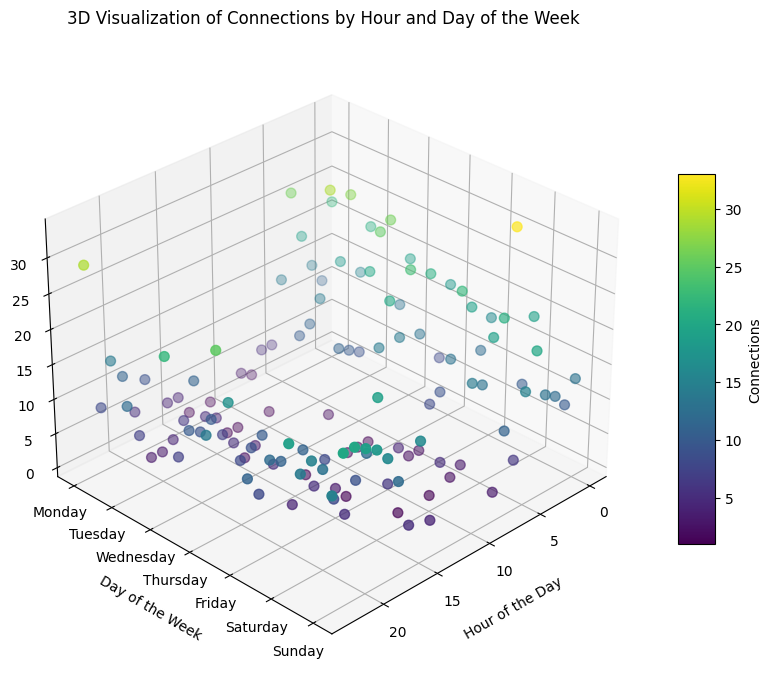

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Assuming 'day_hour_connections' is already loaded as a DataFrame

# Extract data
x = day_hour_connections['hour']  # X-axis: Hour of the day
y = day_hour_connections['day_of_week_numeric']  # Y-axis: Day of the week (numeric)
z = day_hour_connections['connections']  # Z-axis: Number of connections

# Mapping numeric days to weekday names
day_labels = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
              4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
day_names = y.map(day_labels)

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data as scatter points
sc = ax.scatter(x, y, z, c=z, cmap='viridis', s=50)

# Add labels and title
ax.set_xlabel('Hour of the Day', labelpad=10)
ax.set_ylabel('Day of the Week', labelpad=10)
ax.set_zlabel('Number of Connections', labelpad=10)
ax.set_title('3D Visualization of Connections by Hour and Day of the Week', pad=20)

# Replace numeric Y-axis labels with weekday names
ax.set_yticks(list(day_labels.keys()))
ax.set_yticklabels(list(day_labels.values()))

# Add color bar
cbar = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=10)
cbar.set_label('Connections')

# Customize the view angle
ax.view_init(elev=30, azim=45)

# Show the plot
plt.show()

# ===================================================================

In [23]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

# Define features (X) and target (y)
features = day_hour_connections[["hour", "day_of_week_numeric"]]
target = day_hour_connections["connections"]

# Split the data into training (85%) and testing (15%) sets
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(features, target, train_size=0.85)

# Define the KNN regression pipeline
knn_pipeline_full = make_pipeline(StandardScaler(), KNeighborsRegressor())

# Train and evaluate the initial model
knn_pipeline_full.fit(X_train_full, y_train_full)
y_pred_full = knn_pipeline_full.predict(X_test_full)

# Calculate initial RMSPE
rmspe_initial_full = np.sqrt(np.mean((y_test_full - y_pred_full) ** 2) / np.mean(y_test_full ** 2))
print(f"Initial Test set RMSPE (Full Dataset): {rmspe_initial_full}")

# Use GridSearchCV to find the optimal number of neighbors
param_grid_full = {
    "kneighborsregressor__n_neighbors": range(1, 21)  # Search for K values from 1 to 20
}
grid_search_full = GridSearchCV(
    estimator=knn_pipeline_full,
    param_grid=param_grid_full,
    cv=5,
    scoring="neg_root_mean_squared_error"
)

# Fit GridSearchCV on the training data
grid_search_full.fit(X_train_full, y_train_full)

# Retrieve the optimal K value
optimal_k_full = grid_search_full.best_params_["kneighborsregressor__n_neighbors"]
print(f"Optimal K value after GridSearchCV (Full Dataset): {optimal_k_full}")

# Train the KNN model with the optimal K
best_knn_model_full = grid_search_full.best_estimator_

# Make predictions using the tuned model
y_pred_grid_search_full = best_knn_model_full.predict(X_test_full)

# Calculate RMSPE for the tuned model
rmspe_grid_search_full = np.sqrt(np.mean((y_test_full - y_pred_grid_search_full) ** 2) / np.mean(y_test_full ** 2))
print(f"Test set RMSPE after GridSearchCV tuning (Full Dataset): {rmspe_grid_search_full}")

Initial Test set RMSPE (Full Dataset): 0.4654497591157069
Optimal K value after GridSearchCV (Full Dataset): 5
Test set RMSPE after GridSearchCV tuning (Full Dataset): 0.4654497591157069


In [24]:
# Convert 'density_label' to numeric values
day_hour_data = day_hour_connections.copy()  # To avoid altering the original data
day_hour_data["density_label_numeric"] = day_hour_data["density_label"].replace({
    "Low": 0,
    "Medium": 1,
    "High": 2
})

# Select the features and target variable
features = day_hour_data[["hour", "day_of_week_numeric", "density_label_numeric"]]  # Features
target = day_hour_data["connections"]  # Target variable

# Split the dataset into training and testing sets (85% training, 15% testing)
features_train, features_test, target_train, target_test = train_test_split(features, target, train_size=0.85)

# Preprocess the data and create the pipeline for KNN
knn_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor())

# Train the KNN model and evaluate its initial performance
knn_pipeline.fit(features_train, target_train)
target_pred_initial = knn_pipeline.predict(features_test)

# Calculate RMSPE (Root Mean Squared Percentage Error)
rmspe_initial = np.sqrt(np.mean((target_test - target_pred_initial) ** 2) / np.mean(target_test ** 2))
print("Initial Test set RMSPE:", rmspe_initial)

# Define the parameter grid for GridSearchCV (tuning the n_neighbors parameter)
param_grid_knn = {
    "kneighborsregressor__n_neighbors": range(1, 21)  # Search for K values from 1 to 20
}

# Create the GridSearchCV object with 5-fold cross-validation
knn_grid_search = GridSearchCV(
    estimator=knn_pipeline,
    param_grid=param_grid_knn, 
    cv=5,
    scoring="neg_root_mean_squared_error", 
)

# Fit the GridSearchCV object on the training data
knn_grid_search.fit(features_train, target_train)

# Get the best K value from GridSearchCV
optimal_k_value = knn_grid_search.best_params_["kneighborsregressor__n_neighbors"]
print("Optimal K value after GridSearchCV:", optimal_k_value)

# Train the KNN model using the optimal K from GridSearchCV
best_knn_model = knn_grid_search.best_estimator_

# Make predictions on the test set
target_pred_grid_search = best_knn_model.predict(features_test)

# Calculate the RMSPE for the GridSearchCV tuned model
rmspe_grid_search = np.sqrt(np.mean((target_test - target_pred_grid_search) ** 2) / np.mean(target_test ** 2))
print("Test set RMSPE after GridSearchCV tuning:", rmspe_grid_search)


Initial Test set RMSPE: 0.257024519402231
Optimal K value after GridSearchCV: 3
Test set RMSPE after GridSearchCV tuning: 0.2560244162403469


In [25]:
# Split the data by clusters
low_cluster = day_hour_connections[day_hour_connections['density_label'] == 'Low']
medium_cluster = day_hour_connections[day_hour_connections['density_label'] == 'Medium']
high_cluster = day_hour_connections[day_hour_connections['density_label'] == 'High']

# Dictionary to store RMSPE for each cluster
cluster_rmspe = {}

# Train and evaluate KNN regression for each cluster
clusters = {
    "Low": low_cluster,
    "Medium": medium_cluster,
    "High": high_cluster
}

for label, cluster_data in clusters.items():
    print(f"\nCluster: {label}")
    
    # Define features (X) and target (y)
    X = cluster_data[["hour", "day_of_week_numeric"]]
    y = cluster_data["connections"]
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85)
    
    # Define and train the KNN regression pipeline
    knn_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor())
    knn_pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = knn_pipeline.predict(X_test)
    
    # Calculate RMSPE
    rmspe = np.sqrt(np.mean((y_test - y_pred) ** 2) / np.mean(y_test ** 2))
    cluster_rmspe[label] = rmspe
    print(f"RMSPE for Cluster '{label}': {rmspe}")

# Overall KNN regression using all data
print("Overall KNN Regression")

# Convert 'density_label' to numeric values for modeling
day_hour_connections["density_label_numeric"] = day_hour_connections["density_label"].replace({
    "Low": 0,
    "Medium": 1,
    "High": 2
})

# Define features (X) and target (y) for the entire dataset
X = day_hour_connections[["hour", "day_of_week_numeric", "density_label_numeric"]]
y = day_hour_connections["connections"]

# Split the data into training (75%) and testing (25%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85)

# Define the KNN regression pipeline
pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor())

# Train and evaluate the initial model
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Calculate initial RMSPE
rmspe_initial = np.sqrt(np.mean((y_test - y_pred) ** 2) / np.mean(y_test ** 2))
print(f"Initial Test set RMSPE: {rmspe_initial}")

# Use GridSearchCV to find the optimal number of neighbors
param_grid = {
    "kneighborsregressor__n_neighbors": range(1, 21)  # Search for K values from 1 to 20
}
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=5,
    scoring="neg_root_mean_squared_error"
)

# Fit GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Retrieve the optimal K value
optimal_k = grid_search.best_params_["kneighborsregressor__n_neighbors"]
print(f"Optimal K value after GridSearchCV: {optimal_k}")

# Train the KNN model with the optimal K
best_knn_model = grid_search.best_estimator_

# Make predictions using the tuned model
y_pred_grid_search = best_knn_model.predict(X_test)

# Calculate RMSPE for the tuned model
rmspe_grid_search = np.sqrt(np.mean((y_test - y_pred_grid_search) ** 2) / np.mean(y_test ** 2))
print(f"Test set RMSPE after GridSearchCV tuning: {rmspe_grid_search}")



Cluster: Low
RMSPE for Cluster 'Low': 0.2773500981126145

Cluster: Medium
RMSPE for Cluster 'Medium': 0.2631539473388153

Cluster: High
RMSPE for Cluster 'High': 0.15016125206221304
Overall KNN Regression
Initial Test set RMSPE: 0.19343803467955145
Optimal K value after GridSearchCV: 5
Test set RMSPE after GridSearchCV tuning: 0.19343803467955145


In [26]:
import plotly.graph_objects as go
import numpy as np
from sklearn.neighbors import KNeighborsRegressor

# Prepare the data
x = day_hour_connections['hour']  # X-axis: Hour of the day
y = day_hour_connections['day_of_week_numeric']  # Y-axis: Day of the week (numeric)
z = day_hour_connections['connections']  # Z-axis: Number of connections

# Create a grid for surface plot
hour_grid = np.linspace(x.min(), x.max(), 50)  # Fine-grained hours
day_grid = np.linspace(y.min(), y.max(), 50)  # Fine-grained days
hour_mesh, day_mesh = np.meshgrid(hour_grid, day_grid)

# Fit a surface using a KNN model
knn_surface_model = KNeighborsRegressor(n_neighbors=optimal_k)  # Example optimal K
knn_surface_model.fit(np.column_stack((x, y)), z)
z_mesh = knn_surface_model.predict(np.column_stack((hour_mesh.ravel(), day_mesh.ravel()))).reshape(hour_mesh.shape)

# Create the surface plot
surface = go.Surface(
    x=hour_mesh,
    y=day_mesh,
    z=z_mesh,
    colorscale="Viridis",
    showscale=True,
    colorbar=dict(title="Connections")
)

# Create scatter points for actual data
scatter = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=5,
        color=z,
        colorscale='Viridis',
        opacity=0.8
    ),
    name="Actual Data Points"
)

# Define day labels for better readability
day_labels = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
              4: 'Friday', 5: 'Saturday', 6: 'Sunday'}

# Customize the layout with readable Y-axis labels
fig = go.Figure(data=[surface, scatter])
fig.update_layout(
    title="Interactive 3D Visualization of Connections",
    scene=dict(
        xaxis=dict(title="Hour of the Day"),
        yaxis=dict(
            title="Day of the Week",
            tickvals=list(day_labels.keys()),  # Numeric tick values
            ticktext=list(day_labels.values())  # Corresponding day names
        ),
        zaxis=dict(title="Number of Connections"),
    ),
    width=900,
    height=700
)

# Show the interactive plot
fig.show()

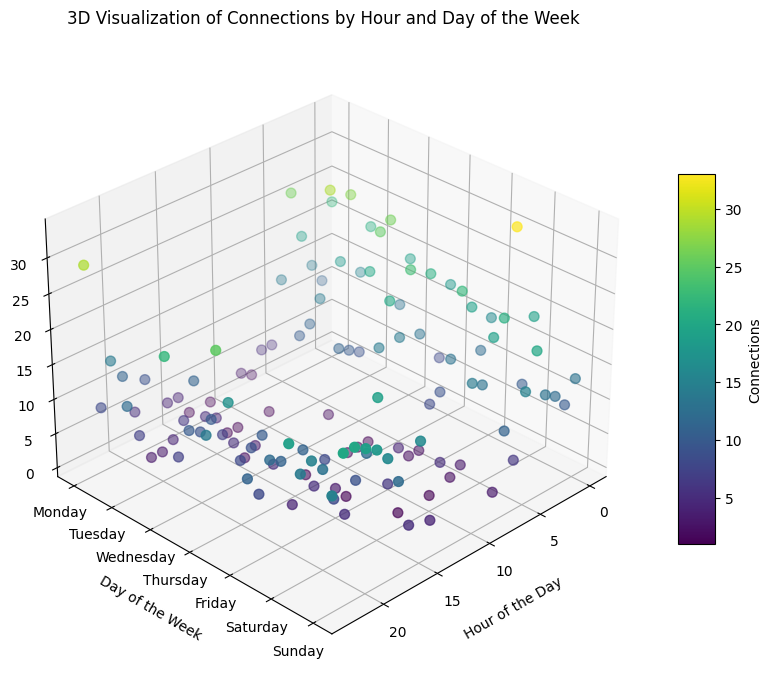

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Assuming 'day_hour_connections' is already loaded as a DataFrame

# Extract data
x = day_hour_connections['hour']  # X-axis: Hour of the day
y = day_hour_connections['day_of_week_numeric']  # Y-axis: Day of the week (numeric)
z = day_hour_connections['connections']  # Z-axis: Number of connections

# Mapping numeric days to weekday names
day_labels = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
              4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
day_names = y.map(day_labels)

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data as scatter points
sc = ax.scatter(x, y, z, c=z, cmap='viridis', s=50)

# Add labels and title
ax.set_xlabel('Hour of the Day', labelpad=10)
ax.set_ylabel('Day of the Week', labelpad=10)
ax.set_zlabel('Number of Connections', labelpad=10)
ax.set_title('3D Visualization of Connections by Hour and Day of the Week', pad=20)

# Replace numeric Y-axis labels with weekday names
ax.set_yticks(list(day_labels.keys()))
ax.set_yticklabels(list(day_labels.values()))

# Add color bar
cbar = fig.colorbar(sc, ax=ax, shrink=0.6, aspect=10)
cbar.set_label('Connections')

# Customize the view angle
ax.view_init(elev=30, azim=45)

# Show the plot
plt.show()